In [9]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
import shap

In [2]:
Xtrain = pd.read_csv("Xtrain.csv")
ytrain = pd.read_csv("ytrain.csv").cardio
Xtest = pd.read_csv("Xtest.csv")
ytest = pd.read_csv("ytest.csv").cardio

The score is 0.734048 for XGB baseline


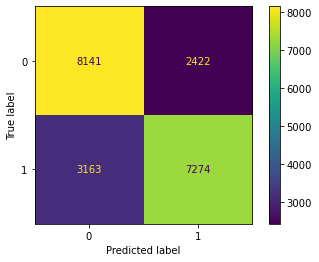

In [3]:
model_baseline = XGBClassifier(n_estimators = 100,use_label_encoder=False,eval_metric='mlogloss',random_state=0)
model_baseline.fit(Xtrain,ytrain)
ypr = model_baseline.predict(Xtest)
probTest = model_baseline.predict_proba(Xtest)
probTest = probTest[:,1]
function.eval_confusion("XGB baseline",model_baseline.score(Xtest,ytest),ypr,ytest)

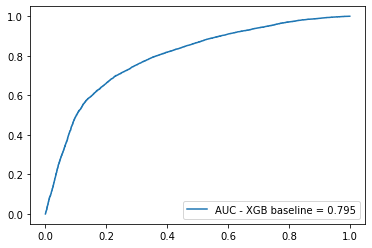

In [4]:
function.eval_auc("XGB baseline",ytest,probTest)

In [5]:
param_grid = dict({'n_estimators': [25,50, 100, 150, 200],'learning_rate' : [0.001, 0.01,0.1,0.2]})
GridXGB = GridSearchCV(model_baseline,param_grid)
GridXGB.fit(Xtrain,ytrain)
GridXGB.best_params_

{'learning_rate': 0.1, 'n_estimators': 50}

The score is 0.734048 for XGB final


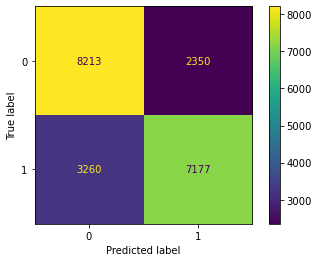

In [6]:
model_final = XGBClassifier(n_estimators = 50,learning_rate = 0.1,use_label_encoder=False,eval_metric='mlogloss',random_state=0)
model_final.fit(Xtrain,ytrain)
ypr = model_final.predict(Xtest)
probTest = model_final.predict_proba(Xtest)
probTest = probTest[:,1]
function.eval_confusion("XGB final",model_baseline.score(Xtest,ytest),ypr,ytest)

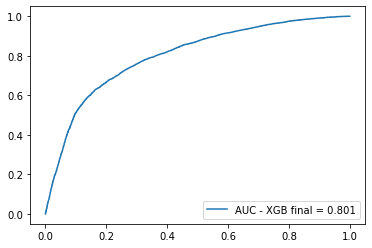

In [7]:
function.eval_auc("XGB final",ytest,probTest)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


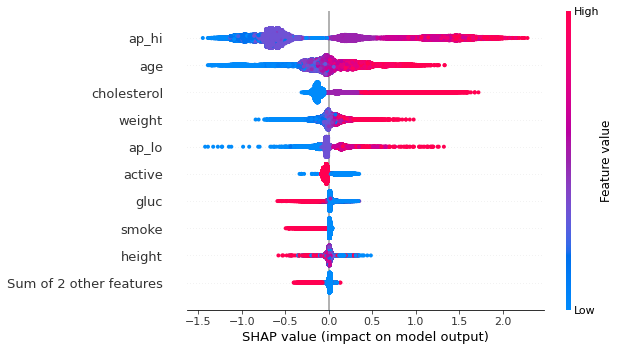

In [10]:
explainer = shap.Explainer(model_final)
shap_values = explainer(Xtrain)
shap.plots.beeswarm(shap_values)